## **Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**
### **Maestría en Inteligencia Artificial Aplicada**
### **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Prof PhD. María de la Paz Rico
### **Nombre del estudiante: Matthias Sibrian Illescas**
### **Matrícula: A01794249**
### **27 de octubre de 2022**



### Bienvenido al notebook
### Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




## Eigenvalores y eigenvectores

In [30]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#Primero, se instancia la matriz resultante para poder ir a escribir a cada una de sus posiciones.
# La matriz resultante será de 3x3, debido a que las tres matrices que se multiplican son
#de 3x3 también.
W_D = [[0,0,0],  
        [0,0,0],  
        [0,0,0]] 
#Se itera por fila y luego por columna de las matrices W y D, las primeras que se multiplicarán.
for i in range(len(W)):  
   for j in range(len(D[0])):  
       for k in range(len(D)):  
        #Se escribe el valor redondeado hacia la posición de W*D.
           W_D[i][j] += round(W[i][k] * D[k][j])
#Se crea la matriz final, B, que será la multiplicación de W_D * la inversa de W.
B = [[0,0,0],  
    [0,0,0],  
    [0,0,0]] 
#Se itera por fila de W_D y luego por la columna de la inversa, la segunda multiplicación.
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)): 
        #Se escribe el valor redondeado a la posición de B. 
           B[i][j] += round(W_D[i][k] * Winv[k][j])
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
-----------------------------


In [31]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
W_D = [[0,0,0],  
        [0,0,0],  
        [0,0,0]] 
for i in range(len(W)):  
   for j in range(len(D[0])):  
       for k in range(len(D)):  
           num = (W[i][k] * D[k][j]) 
           W_D[i][j] += round(num.real, 2) + round(num.imag, 2) * 1j

B = [[0,0,0],  
    [0,0,0],  
    [0,0,0]] 
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)):  
            num = (W_D[i][k] * Winv[k][j])
            num_round = np.round(num.real, 2)
            B[i][j] += np.round(num_round, 2)
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)):  
            B[i][j] = round(B[i][j])
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[3, 0, 2], [3, 0, -2], [0, 1, 1]]
-----------------------------


In [32]:
#Matriz 2
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
W_D = [[0,0,0],  
        [0,0,0],  
        [0,0,0]] 
for i in range(len(W)):  
   for j in range(len(D[0])):  
       for k in range(len(D)):  
           num = (W[i][k] * D[k][j]) 
           W_D[i][j] += round(num.real, 2) + round(num.imag, 2) * 1j

B = [[0,0,0],  
    [0,0,0],  
    [0,0,0]] 
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)):  
            num = (W_D[i][k] * Winv[k][j])
            num_round = np.round(num.real, 2)
            B[i][j] += np.round(num_round, 2)
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)):  
            B[i][j] = round(B[i][j])
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[3, 0, 2], [3, 0, -2], [0, 1, 1]]
-----------------------------


In [33]:
#Matriz 3
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
W_D = [[0,0,0],  
        [0,0,0],  
        [0,0,0]] 
for i in range(len(W)):  
   for j in range(len(D[0])):  
       for k in range(len(D)):  
           num = (W[i][k] * D[k][j]) 
           W_D[i][j] += round(num.real, 2) + round(num.imag, 2) * 1j

B = [[0,0,0],  
    [0,0,0],  
    [0,0,0]] 
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)):  
            num = (W_D[i][k] * Winv[k][j])
            num_round = np.round(num.real, 2)
            B[i][j] += np.round(num_round, 2)
for i in range(len(W_D)):  
   for j in range(len(Winv[0])):  
       for k in range(len(Winv)):  
            B[i][j] = round(B[i][j])
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[5, 4, 0], [1, 0, 1], [10, 7, 1]]
-----------------------------


## **Comentarios relevantes de PCA y el proceso realizado.**

En este ejercicio, se llevó a cabo un proceso de tres partes: el cálculo de la matrices W, D y W inversa, con el fin de evidenciar el proceso a través del cual se puede descomponer una matriz inicial a través de sus eigenvectores.

A través del ejercicio, fue evidente que las matrices permiten transformar a la matriz original en un nuevo espacio, pero siempre con la posibilidad de retornarla a sus valores iniciales a través de una multiplicación matricial.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


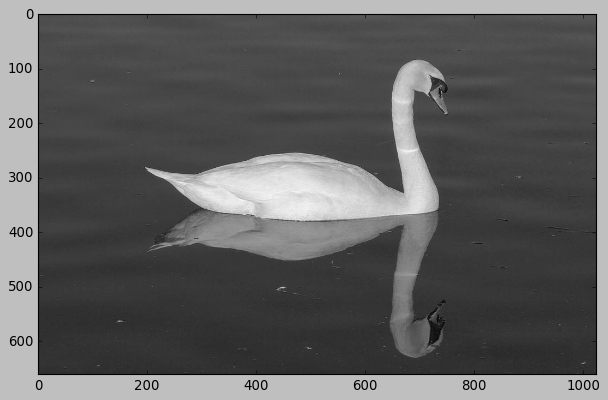

<PIL.Image.Image image mode=LA size=1024x660 at 0x283544E46D0>


In [34]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [35]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [36]:
U.shape

(660, 660)

In [37]:
V.shape

(1024, 1024)

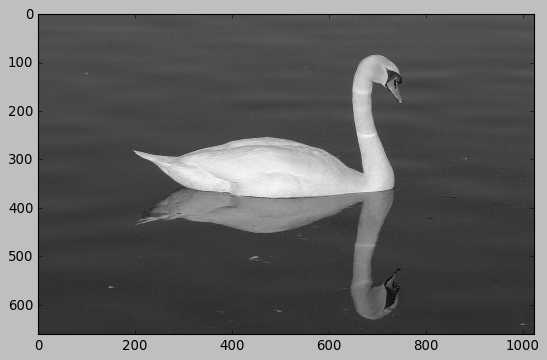

Felicidades la imagen está comprimida


In [38]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 100
#Personalmente, encontré que el valor de 100 era la mejor opción, para aun ver el resultado
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

## Imagen 1

[165. 170. 173. ... 139.  76.  98.]


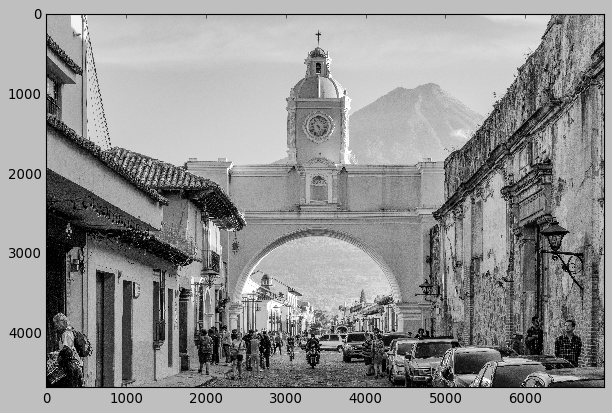

<PIL.Image.Image image mode=LA size=6993x4664 at 0x28354526EE0>


In [39]:
#imagen 1

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/6/61/Santa_Catalina_Arch_-_Antigua_Guatemala_Feb_2020.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

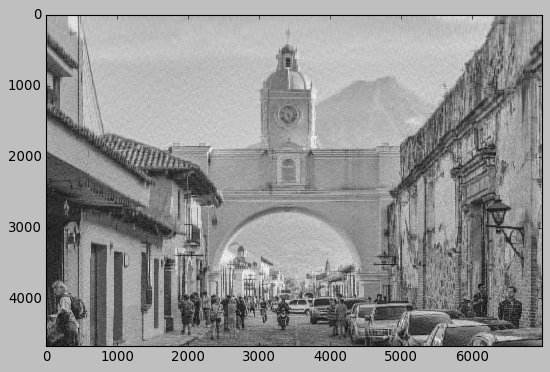

Felicidades la imagen está comprimida


In [40]:
U,D,V = np.linalg.svd(imgmat)
nvalue = 100
#Personalmente, encontré que el valor de 100 era la mejor opción, para aun ver el resultado
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

## Imagen 2

[108. 110. 111. ... 174. 172. 172.]


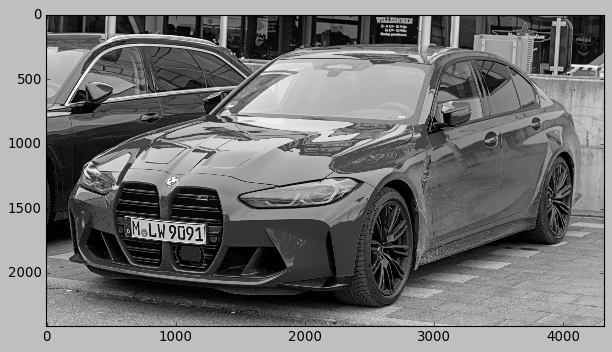

<PIL.Image.Image image mode=LA size=4321x2406 at 0x2833DAC3D30>


In [41]:
#imagen 2
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/8/8a/BMW_M3_Competition_%28G80%29_IMG_4041.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

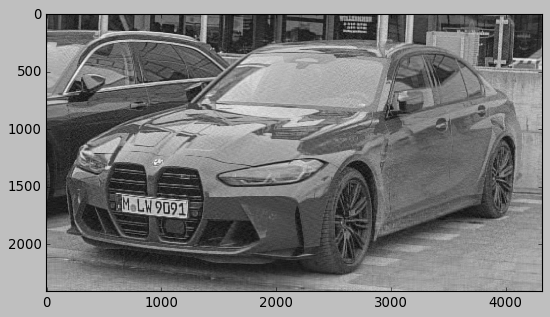

Felicidades la imagen está comprimida


In [42]:
U,D,V = np.linalg.svd(imgmat)
nvalue = 100
#Personalmente, encontré que el valor de 100 era la mejor opción, para aun ver el resultado
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

## Imagen 3

[ 57.  63.  69. ... 117. 115. 120.]


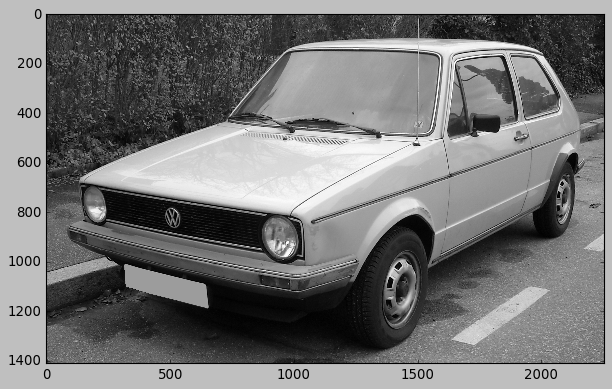

<PIL.Image.Image image mode=LA size=2256x1408 at 0x2833E31EE50>


In [43]:
#imagen 3
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/1/18/VW_Golf_I_Facelift_front_20081209.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

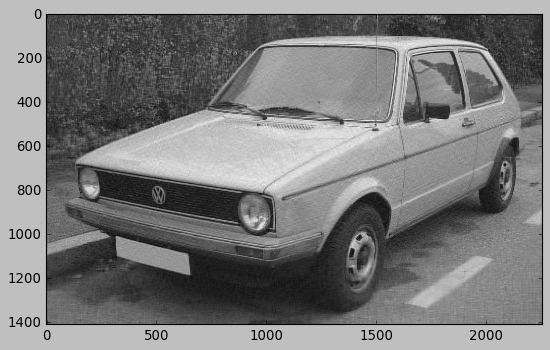

Felicidades la imagen está comprimida


In [44]:
U,D,V = np.linalg.svd(imgmat)
nvalue = 100
#Personalmente, encontré que el valor de 100 era la mejor opción, para aun ver el resultado
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

## **Comentarios relevantes de SVD y el proceso realizado.**

SVD es un proceso de reducción de ruido que permite ver cómo se puede contener una imagen aun reteniendo sus características principales, pero utilizando muchos menos pixeles para representarla. Es un proceso muy útil para la compresión efectiva.